In [3]:
pip install pandas catboost numpy

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl (11.6 MB)
  Using cached catboost-1.2.7-cp310-cp310-win_amd64.whl (101.8 MB)
  Using cached numpy-2.2.4-cp310-cp310-win_amd64.whl (12.9 MB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
  Using cached plotly-6.0.1-py3-none-any.whl (14.8 MB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
  Using cached scipy-1.15.2-cp310-cp310-win_amd64.whl (41.2 MB)
  Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl (71 kB)
  Using cached pillow-11.1.0-cp310-cp310-win_amd64.whl (2.6 MB)
  Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
  Using cached fonttools-4.56.0-cp310-cp310-win_amd64.whl (2.2 MB)
  Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl (218 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib

ModuleNotFoundError: No module named 'pandas'

In [16]:
# Загрузка данных
train_data = pd.read_excel('train.xlsx')
test_data = pd.read_excel('test.xlsx')

# Проверка загруженных данных
print("Train data preview:")
print(train_data.head())
print("Test data preview:")
print(test_data.head())

Train data preview:
          dt  Цена на арматуру
0 2015-01-05             32900
1 2015-01-12             32500
2 2015-01-19             32000
3 2015-01-26             30700
4 2015-02-02             30300
Test data preview:
          dt  Цена на арматуру
0 2022-09-05             46000
1 2022-09-12             46000
2 2022-09-19             46000
3 2022-09-26             45500
4 2022-10-03             45500


In [17]:
# Преобразование столбца 'dt' в datetime
train_data['dt'] = pd.to_datetime(train_data['dt'])
test_data['dt'] = pd.to_datetime(test_data['dt'])

In [18]:
# Убедимся, что данные отсортированы по дате
train_data = train_data.sort_values(by='dt')


In [19]:
# Создадим временные признаки
for i in range(1, 11):  # Создаем сдвиги для 10 предыдущих недель
    train_data[f'lag_{i}'] = train_data['Цена на арматуру'].shift(i)

# Удалим строки с NaN (первая часть данных не имеет значений из-за сдвига)
train_data = train_data.dropna()

# Определение целевой переменной и признаков
X = train_data.drop(columns=['dt', 'Цена на арматуру'])
y = train_data['Цена на арматуру']

In [6]:
# Разделение данных на обучающую и валидационную выборки
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Создание и обучение модели CatBoost
model = CatBoostRegressor(
    iterations=500,
    depth=10,
    learning_rate=0.1,
    random_seed=42,
    verbose=100,  # Параметр для вывода информации о процессе обучения
    objective='RMSE'
)

# Обучение модели
model.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=100)

0:	learn: 12214.3999796	test: 13232.6940615	best: 13232.6940615 (0)	total: 18.2ms	remaining: 9.1s
100:	learn: 844.9165997	test: 2215.5743988	best: 2215.5743988 (100)	total: 1.8s	remaining: 7.09s
200:	learn: 397.3398522	test: 2006.1871019	best: 2004.9306906 (195)	total: 3.47s	remaining: 5.17s
300:	learn: 216.4932653	test: 1942.3970148	best: 1942.2663334 (294)	total: 5.21s	remaining: 3.44s
400:	learn: 137.7949241	test: 1921.7248475	best: 1921.7248475 (400)	total: 6.92s	remaining: 1.71s
499:	learn: 90.5688385	test: 1910.6902778	best: 1910.6272896 (492)	total: 8.6s	remaining: 0us

bestTest = 1910.62729
bestIteration = 492

Shrink model to first 493 iterations.


C:\Users\~Шамиль\AppData\Local\Temp\ipykernel_12280\2335098421.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Цена на арматуру'].interpolate(method='linear', inplace=True)


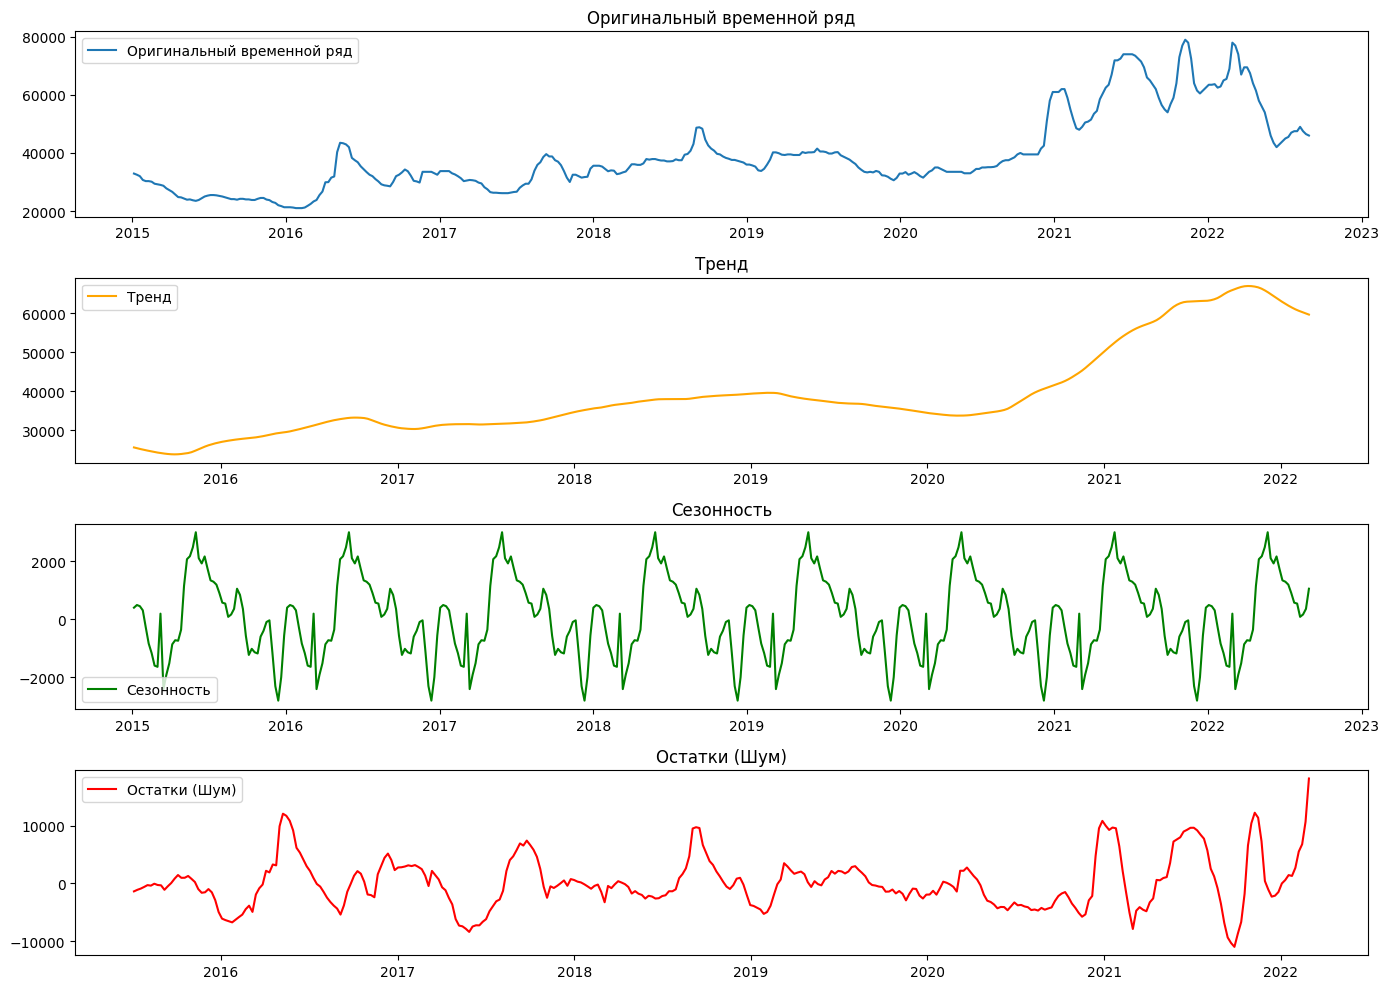

In [21]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Загрузка данных
train_data = pd.read_excel('train.xlsx')

# Преобразование столбца 'dt' в datetime
train_data['dt'] = pd.to_datetime(train_data['dt'])

# Убедимся, что данные отсортированы по дате
train_data = train_data.sort_values(by='dt')

# Устанавливаем 'dt' как индекс
train_data.set_index('dt', inplace=True)

# Заполняем пропущенные значения (если есть), например, методом прямой интерполяции
train_data['Цена на арматуру'].interpolate(method='linear', inplace=True)

# Разложение временного ряда
decomposition = sm.tsa.seasonal_decompose(train_data['Цена на арматуру'], model='additive')

# Получение компонентов
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Визуализация
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(train_data['Цена на арматуру'], label='Оригинальный временной ряд')
plt.title('Оригинальный временной ряд')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Тренд', color='orange')
plt.title('Тренд')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Сезонность', color='green')
plt.title('Сезонность')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Остатки (Шум)', color='red')
plt.title('Остатки (Шум)')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# Подготовка тестовых данных
# Сдвиги для тестовых данных
test_data = test_data.sort_values(by='dt')
for i in range(1, 11):
    test_data[f'lag_{i}'] = np.nan

In [12]:
# Заполняем lag значения для тестовых данных
for i in range(len(test_data)):
    if i > 9:  # Проверяем, чтобы было достаточно прошлых значений
        for j in range(1, 11):
            test_data.loc[i, f'lag_{j}'] = train_data['Цена на арматуру'].iloc[-10 + j - 1]

In [13]:
# Определяем тестовые признаки
X_test = test_data.drop(columns=['dt'], errors='ignore')

# Предсказание
predictions = model.predict(X_test)

In [14]:
# Подготовка кода для создания DataFrame с результатами
output = pd.DataFrame({'dt': test_data['dt'], 'Predicted Цена на арматуру': predictions})
print(output)

           dt  Predicted Цена на арматуру
0  2022-09-05                23006.005486
1  2022-09-12                23006.005486
2  2022-09-19                23006.005486
3  2022-09-26                23006.005486
4  2022-10-03                23006.005486
5  2022-10-10                23006.005486
6  2022-10-17                23006.005486
7  2022-10-24                23006.005486
8  2022-10-31                23006.005486
9  2022-11-07                23006.005486
10 2022-11-14                47174.028925
11 2022-11-21                47174.028925
12 2022-11-28                47174.028925
13 2022-12-05                47174.028925
14 2022-12-12                47174.028925
15 2022-12-19                47174.028925
16 2022-12-26                47174.028925
17 2023-01-02                47174.028925
18 2023-01-09                47174.028925
19 2023-01-16                47174.028925
20 2023-01-23                47174.028925
21 2023-01-30                47174.028925
22 2023-02-06                47174

0:	learn: 12393.8109500	total: 19.9ms	remaining: 9.93s
100:	learn: 888.8974852	total: 1.97s	remaining: 7.78s
200:	learn: 439.9404918	total: 3.98s	remaining: 5.92s
300:	learn: 255.4476638	total: 5.96s	remaining: 3.94s
400:	learn: 162.5539150	total: 7.92s	remaining: 1.96s
499:	learn: 110.1730992	total: 9.87s	remaining: 0us


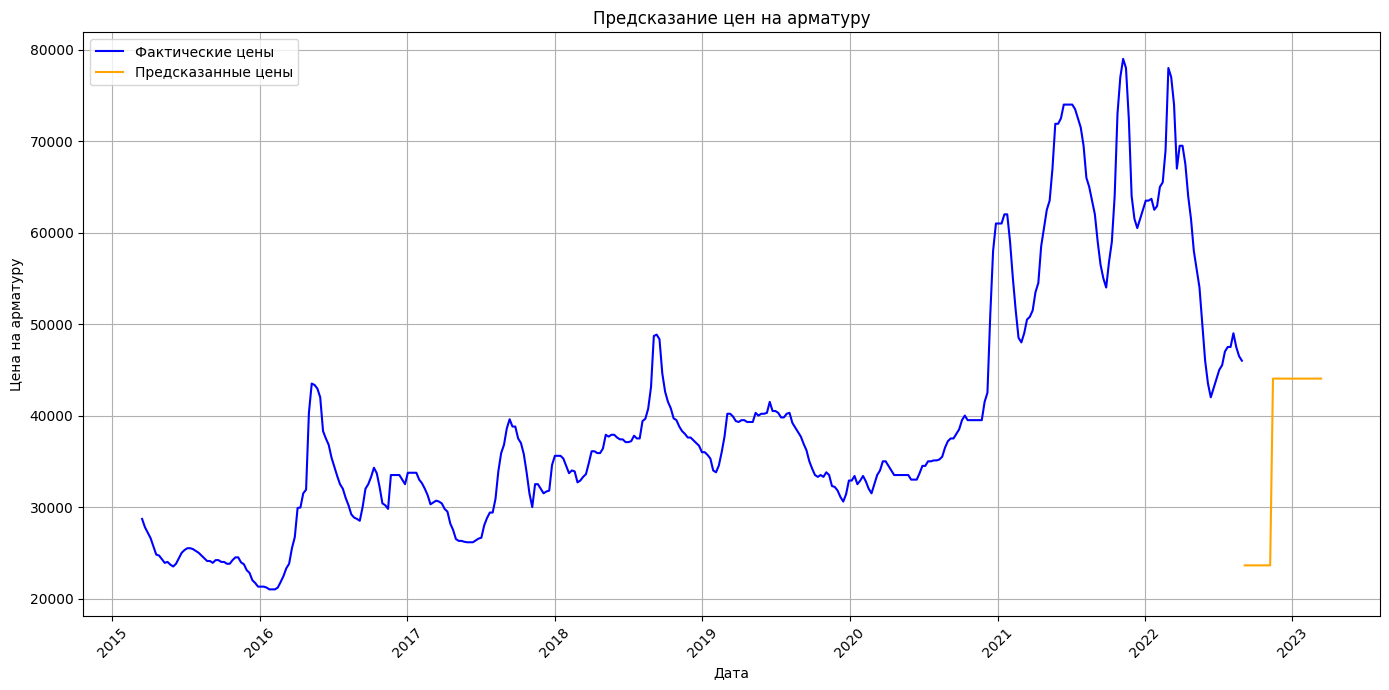

In [22]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor

# Загрузка данных
train_data = pd.read_excel('train.xlsx')
test_data = pd.read_excel('test.xlsx')

# Преобразование столбца 'dt' в datetime
train_data['dt'] = pd.to_datetime(train_data['dt'])
test_data['dt'] = pd.to_datetime(test_data['dt'])

# Убедимся, что данные отсортированы по дате
train_data = train_data.sort_values(by='dt')

# Создание lag-признаков
for i in range(1, 11):
    train_data[f'lag_{i}'] = train_data['Цена на арматуру'].shift(i)

# Удаляем строки с NaN
train_data.dropna(inplace=True)

# Разделение на признаки и целевую переменную
X = train_data.drop(columns=['dt', 'Цена на арматуру'])
y = train_data['Цена на арматуру']

# Обучение модели CatBoost
model = CatBoostRegressor(iterations=500, depth=10, learning_rate=0.1, random_seed=42, verbose=100)
model.fit(X, y)

# Создание lag-признаков для тестового набора
test_data.sort_values(by='dt', inplace=True)
for i in range(1, 11):
    test_data[f'lag_{i}'] = np.nan

# Заполнение lag-признаков для тестового набора
for i in range(len(test_data)):
    if i > 9:  # Для заполнения lag-параметров
        for j in range(1, 11):
            test_data.loc[i, f'lag_{j}'] = train_data['Цена на арматуру'].iloc[-10 + j - 1]

# Прогнозирование на тестовом наборе
X_test = test_data.drop(columns=['dt'])
predictions = model.predict(X_test)

# Визуализация предсказаний
plt.figure(figsize=(14, 7))

# Оригинальные данные
plt.plot(train_data['dt'], train_data['Цена на арматуру'], label='Фактические цены', color='blue')

# Даты предсказаний
pred_dates = test_data['dt']

# Предсказанные данные
plt.plot(pred_dates, predictions, label='Предсказанные цены', color='orange')

plt.title('Предсказание цен на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена на арматуру')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()